In [358]:
#importing libraries
# male = 1, female = 0
# Potential Biases: more males than females, right skewed

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from itertools import repeat
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#Setting random seed
np.random.seed(0)

In [360]:
data = pd.read_csv('https://raw.githubusercontent.com/plmkonist/AI4all/main/heart.csv')

In [361]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [362]:
clean_data = data.drop(columns =['restecg', 'slp', 'oldpeak'])

In [363]:
clean_data

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,caa,thall,output
0,63,1,3,145,233,1,150,0,0,1,1
1,37,1,2,130,250,0,187,0,0,2,1
2,41,0,1,130,204,0,172,0,0,2,1
3,56,1,1,120,236,0,178,0,0,2,1
4,57,0,0,120,354,0,163,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,123,1,0,3,0
299,45,1,3,110,264,0,132,0,0,3,0
300,68,1,0,144,193,1,141,0,2,3,0
301,57,1,0,130,131,0,115,1,1,3,0


In [364]:
clean_data.head()

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,caa,thall,output
0,63,1,3,145,233,1,150,0,0,1,1
1,37,1,2,130,250,0,187,0,0,2,1
2,41,0,1,130,204,0,172,0,0,2,1
3,56,1,1,120,236,0,178,0,0,2,1
4,57,0,0,120,354,0,163,1,0,2,1


In [365]:
clean_data.describe()

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,149.646865,0.326733,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,22.905161,0.469794,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,4.000000,3.000000,1.000000


Potential Bias: Our data is skewed to the right

In [366]:
# data['output'] = data['output'].astype(str)

In [367]:
# Assigning training and testing data
#X_train, X_test, y_train, y_test = train_test_split(clean_data, Y, test_size=0.2)

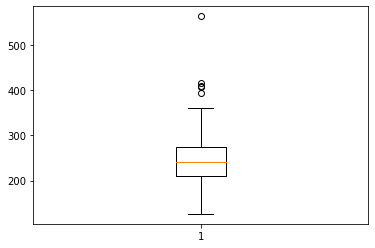

In [368]:
plt.boxplot(data.chol)
plt.show()

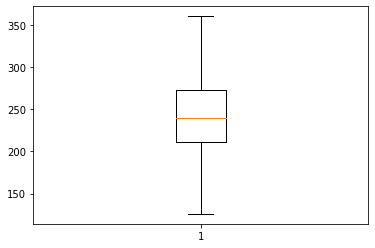

In [369]:
clean_data['chol'] = clean_data['chol'].astype(float)
clean_data = clean_data[clean_data.chol <= 380.0]
plt.boxplot(clean_data.chol)
plt.show()


In [370]:
# Creating a random forest classifier
#clf = RandomForestClassifier(n_jobs = 1, random_state = 0)
# Training Classifier
#clf.fit(X_train, y_train)

In [371]:
Y = clean_data.output
X = clean_data.drop(columns = ['output'])

0.8166666666666667


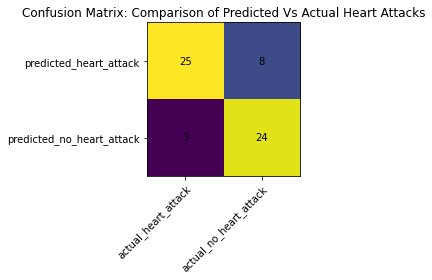

In [372]:
predictions = 0
avg_score = 0.0
ntimes = 1
for i in repeat(None, ntimes):

    # train model with 80% of the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    # prediction
    # Creating a random forest classifier
    clf = RandomForestClassifier(n_jobs = 2, random_state = 0)
    # Training Classifier
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    # compute model accuracy
    avg_score += accuracy_score(y_test, predictions)

avg_score/= ntimes
print(avg_score)

# Creating Heat Map from Condusion Matrix Dataframe
array = pd.crosstab(y_test, predictions, rownames = ['Actual result'], colnames = ['Predicted Result'])
actual_result = ["actual_heart_attack", "actual_no_heart_attack"]
predicted_result = ["predicted_heart_attack", "predicted_no_heart_attack"]
confusion_matrix = np.array(array)
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix)

# We want to show all ticks...
ax.set_xticks(np.arange(len(predicted_result)))
ax.set_yticks(np.arange(len(actual_result)))

# ... and label them with the respective list entries
ax.set_xticklabels(actual_result)
ax.set_yticklabels(predicted_result)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(actual_result)):
    for j in range(len(predicted_result)):
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="black")
ax.set_title("Confusion Matrix: Comparison of Predicted Vs Actual Heart Attacks")
fig.tight_layout()

plt.show()

In [373]:
clean_data.describe()

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,caa,thall,output
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.228188,0.694631,0.969799,131.553691,243.043624,0.147651,149.546980,0.328859,0.721477,2.308725,0.543624
std,9.081836,0.461338,1.032678,17.612519,45.094679,0.355350,23.079853,0.470589,1.018156,0.612983,0.498931
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,133.000000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,152.000000,0.000000,0.000000,2.000000,1.000000
75%,60.750000,1.000000,2.000000,140.000000,273.000000,0.000000,166.750000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,360.000000,1.000000,202.000000,1.000000,4.000000,3.000000,1.000000


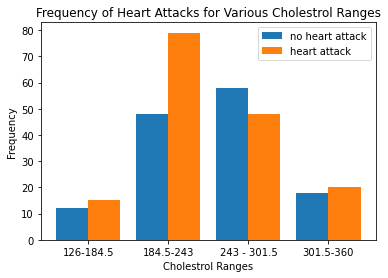

In [374]:
X_labels = ['126-184.5','184.5-243','243 - 301.5','301.5-360']
no_attack = [len( clean_data[(clean_data.chol >= 126.0) & (clean_data.chol < 184.5) & (clean_data.output == 0)]), 
             len( clean_data[(clean_data.chol >= 184.5) & (clean_data.chol < 243) & (clean_data.output == 0)]),
len( clean_data[(clean_data.chol >= 243.0) & (clean_data.chol < 301.5) & (clean_data.output == 0)]),
len( clean_data[(clean_data.chol >= 301.5) & (clean_data.chol <= 360) & (clean_data.output == 0)])]

attack = [len( clean_data[(clean_data.chol >= 126.0) & (clean_data.chol < 184.5) & (clean_data.output == 1)]), 
          len( clean_data[(clean_data.chol >= 184.5) & (clean_data.chol < 243) & (clean_data.output == 1)]),
len( clean_data[(clean_data.chol >= 243.0) & (clean_data.chol < 301.5) & (clean_data.output == 1)]),
len( clean_data[(clean_data.chol >= 301.5) & (clean_data.chol <= 360) & (clean_data.output == 1)])]

X_axis = np.arange(len(X_labels))
  
plt.bar(X_axis - 0.2, no_attack, 0.4, label = 'no heart attack')
plt.bar(X_axis + 0.2, attack, 0.4, label = 'heart attack')
  
plt.xticks(X_axis, X_labels)
plt.xlabel("Cholestrol Ranges")
plt.ylabel("Frequency")
plt.title("Frequency of Heart Attacks for Various Cholestrol Ranges")
plt.legend()
plt.show()